In [2]:
import pandas as pd
diabetes_df = pd.read_csv(r'E:\data set\diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#missing values
print(diabetes_df.isnull().sum())
# Handle missing values by imputing with the mean
diabetes_df.fillna(diabetes_df.mean(), inplace=True)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Standardize features
bring all the features to the same scale.

In [4]:
from sklearn.preprocessing import StandardScaler
# Separate features and target variable
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
print(diabetes_df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


 Implement logistic regression
 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")



Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727


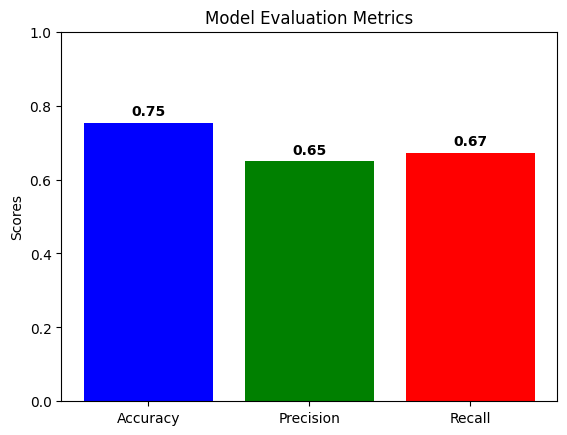

In [8]:
import matplotlib.pyplot as plt
# Plot the evaluation metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}
fig, ax = plt.subplots()
ax.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red'])
ax.set_ylim([0, 1])
ax.set_title('Model Evaluation Metrics')
ax.set_ylabel('Scores')
for i, v in enumerate(metrics.values()):
    ax.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()
